In [180]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import eigh
import pandas as pd

# Bistritzer-Macdonald model

## Constants

In [181]:
phi = 2 * np.pi / 3
ktheta = 1
theta = 1.05 *np.pi/180
kmono = ktheta / 2 / np.sin(theta/2)
w0 = 0  # AA coupling, 0 in chiral limit
w1 = 0.5

In [182]:
def rotate_sigma(theta):
        rot_matrix = np.array([
            [np.cos(theta), np.sin(theta)],
            [-np.sin(theta), np.cos(theta)]
        ])
        return rot_matrix

In [183]:
# Define the Bistritzer-MacDonald Hamiltonian function in the chiral limit
def bistritzer_macdonald_H(k_vec):
    k_vec = np.array(k_vec, dtype=complex)
    H = np.zeros((48, 48), dtype=complex)
    

    ## Moire Potential Terms
    T1 = np.array([[w0, w1], [w1, w0]])
    T2 = np.array([[w0 , w1* np.exp(-1j * phi)],
                    [w1 * np.exp(1j * phi), w0]])
    T3 = np.array([[w0 , w1 * np.exp(1j * phi)], 
                    [w1 * np.exp(-1j * phi), w0]])
    
    #order 1
    H[0:2, 2:4] = T2
    H[2:4, 4:6] = T1
    H[4:6, 6:8] = T3
    H[6:8, 8:10] = T2
    H[8:10, 10:12] = T1
    H[10:12, 0:2] = T3

    #order 2
    H[0:2, 12:14] = T1
    H[2:4, 14:16] = T3
    H[4:6, 16:18] = T2
    H[6:8, 18:20] = T1
    H[8:10, 20:22] = T3
    H[10:12, 22:24] = T2

    #order 3
    H[12:14, 24:26] = T2
    H[12:14, 26:28] = T3
    H[14:16, 28:30] = T1
    H[14:16, 30:32] = T2
    H[16:18, 32:34] = T3
    H[16:18, 34:36] = T1
    H[18:20, 36:38] = T2
    H[18:20, 38:40] = T3
    H[20:22, 40:42] = T1
    H[20:22, 42:44] = T2
    H[22:24, 44:46] = T3
    H[22:24, 46:48] = T1

    H = H + H.conj().T

    ## Kinetic Terms
    k_vecst = k_vec

    q1 = np.array([0, 1])
    q2 = np.array([-np.sqrt(3)/2, -1/2])
    q3 = np.array([np.sqrt(3)/2, -1/2])

    #order 1
    k_A11 = q1
    k_A12 = -q3
    k_A13 = q2
    k_A14 = -q1
    k_A15 = q3
    k_A16 = -q2

    #order 2
    k_B11 = 2*k_A11
    k_B12 = 2*k_A12
    k_B13 = 2*k_A13
    k_B14 = 2*k_A14
    k_B15 = 2*k_A15
    k_B16 = 2*k_A16

    #order 3
    k_A21 = k_B11 - q2
    k_A22 = k_B11 - q3
    k_A23 = k_B12 + q1
    k_A24 = k_B12 + q2
    k_A25 = k_B13 - q3
    k_A26 = k_B13 - q1
    k_A27 = k_B14 + q2
    k_A28 = k_B14 + q3
    k_A29 = k_B15 - q1
    k_A210 = k_B15 - q2
    k_A211 = k_B16 + q3
    k_A212 = k_B16 + q1

    k_vec = k_vecst - k_A11
    k_A11 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A12
    k_A12 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A13
    k_A13 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A14
    k_A14 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A15
    k_A15 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A16
    k_A16 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    
    k_vec = k_vecst - k_B11
    k_B11 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_B12
    k_B12 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_B13
    k_B13 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_B14
    k_B14 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_B15
    k_B15 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_B16
    k_B16 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])

    k_vec = k_vecst - k_A21
    k_A21 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A22
    k_A22 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A23
    k_A23 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A24
    k_A24 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A25
    k_A25 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A26
    k_A26 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A27
    k_A27 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A28
    k_A28 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A29
    k_A29 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A210
    k_A210 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A211
    k_A211 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    k_vec = k_vecst - k_A212
    k_A212 = np.array([[0, k_vec[0] - 1j * k_vec[1]], [k_vec[0] + 1j * k_vec[1], 0]])
    
    H[0:2, 0:2] = k_A11
    H[2:4, 2:4] = k_A12
    H[4:6, 4:6] = k_A13
    H[6:8, 6:8] = k_A14
    H[8:10, 8:10] = k_A15
    H[10:12, 10:12] = k_A16

    H[12:14, 12:14] = k_B11
    H[14:16, 14:16] = k_B12
    H[16:18, 16:18] = k_B13
    H[18:20, 18:20] = k_B14
    H[20:22, 20:22] = k_B15
    H[22:24, 22:24] = k_B16

    H[24:26, 24:26] = k_A21
    H[26:28, 26:28] = k_A22
    H[28:30, 28:30] = k_A23
    H[30:32, 30:32] = k_A24
    H[32:34, 32:34] = k_A25
    H[34:36, 34:36] = k_A26
    H[36:38, 36:38] = k_A27
    H[38:40, 38:40] = k_A28
    H[40:42, 40:42] = k_A29
    H[42:44, 42:44] = k_A210
    H[44:46, 44:46] = k_A211
    H[46:48, 46:48] = k_A212

    return H

In [184]:
import pandas as pd
pd.DataFrame(bistritzer_macdonald_H([1,1]))

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.000000+0.000000j,1.000000+0.000000j,0.000000+0.000000j,-0.250000-0.433013j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
1,1.000000+0.000000j,0.000000+0.000000j,-0.250000+0.433013j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
2,0.000000+0.000000j,-0.250000-0.433013j,0.000000+0.000000j,1.866025-0.500000j,0.000000+0.000000j,0.500000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
3,-0.250000+0.433013j,0.000000+0.000000j,1.866025+0.500000j,0.000000+0.000000j,0.500000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
4,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.500000+0.000000j,0.000000+0.000000j,1.866025-1.500000j,0.000000+0.000000j,-0.250000+0.433013j,0.000000+0.000000j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
5,0.000000+0.000000j,0.000000+0.000000j,0.500000+0.000000j,0.000000+0.000000j,1.866025+1.500000j,0.000000+0.000000j,-0.250000-0.433013j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
6,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.250000+0.433013j,0.000000+0.000000j,1.000000-2.000000j,0.000000+0.000000j,-0.250000-0.433013j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
7,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.250000-0.433013j,0.000000+0.000000j,1.000000+2.000000j,0.000000+0.000000j,-0.250000+0.433013j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
8,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.250000-0.433013j,0.000000+0.000000j,0.133975-1.500000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j
9,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,-0.250000+0.433013j,0.000000+0.000000j,0.133975+1.500000j,0.000000+0.000000j,...,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j,0.000000+0.000000j


In [185]:
def eigsolv(kx, ky, H):
    evecs = []
    evals = []
    for i in range(len(kx)):
        eval, evec = eigh(H([kx[i],ky[i]]))
        evals.append(eval)
        evecs.append(evec)
    return np.array(evals), np.array(evecs)

def plot_bands_3d(kx, ky, bands):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(48):
        ax.plot_trisurf(kx, ky, bands[:, i], cmap='viridis', alpha=0.8)
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
    ax.set_zlabel('Energy')
    ax.view_init(elev=10, azim=45)  # elev를 낮은 값으로 설정 (기본값은 보통 30~40)
    #ax.set_xticks([-kmono, 0, kmono])
    #ax.set_yticks([-kmono, 0, kmono])
    #ax.set_xticklabels(['-$4\pi/3$', 0, '$4\pi/3$'])
    #ax.set_yticklabels(['-$4\pi/3$', 0, '$4\pi/3$'])
    plt.show()

def plot_bands_3d_mini(kx, ky, bands):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(23, 25):
        ax.plot_trisurf(kx, ky, bands[:, i], cmap='viridis', alpha=0.8)
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
    ax.set_zlabel('Energy')
    ax.view_init(elev=10, azim=45)
    ax.set_xticks([-ktheta, 0, ktheta])
    ax.set_yticks([-ktheta, 0, ktheta])
    ax.set_xticklabels([rf'-$k_\theta$', 0, rf'$k_\theta$'])
    ax.set_yticklabels([rf'-$k_\theta$', 0, rf'$k_\theta$'])
    plt.show()

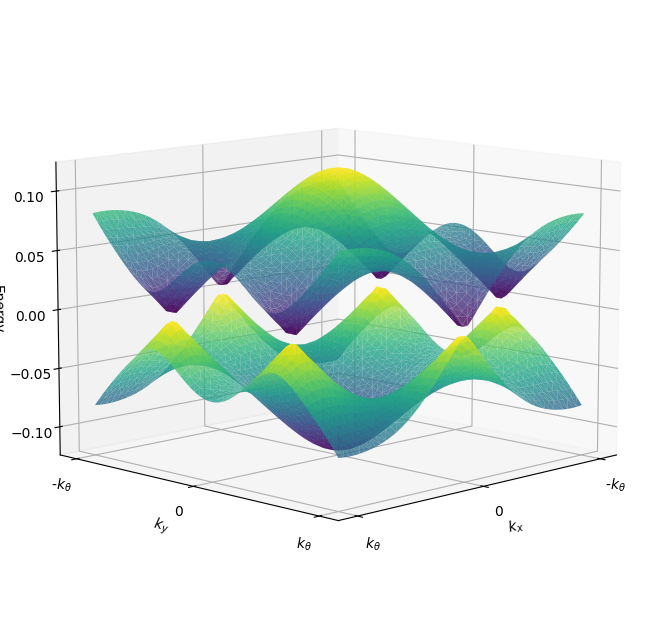

In [186]:
Size = 50
a=1

kx = np.linspace(-4 * np.pi / (3 * a), 4 * np.pi / (3 * a), Size)
ky = np.linspace(-4 * np.pi / (3 * a), 4 * np.pi / (3 * a), Size)
kx_grid, ky_grid = np.meshgrid(kx, ky)
mask = (np.abs(kx_grid) <= 4 * np.pi / (3 * a)) & (np.abs(ky_grid) <= 4 * np.pi / (3 * a))
kx_sq = kx_grid[mask]
ky_sq = ky_grid[mask]
#bands, _ = eigsolv(kx_sq, ky_sq, bistritzer_macdonald_H)
#plot_bands_3d(kx_sq, ky_sq, bands)

kx = np.linspace(-ktheta, ktheta, Size)
ky = np.linspace(-ktheta, ktheta, Size)
kx_grid, ky_grid = np.meshgrid(kx, ky)
mask = (np.abs(kx_grid) <= ktheta) & (np.abs(ky_grid) <= ktheta)
kx_sq = kx_grid[mask]
ky_sq = ky_grid[mask]
bands, _ = eigsolv(kx_sq, ky_sq, bistritzer_macdonald_H)
plot_bands_3d_mini(kx_sq, ky_sq, bands)

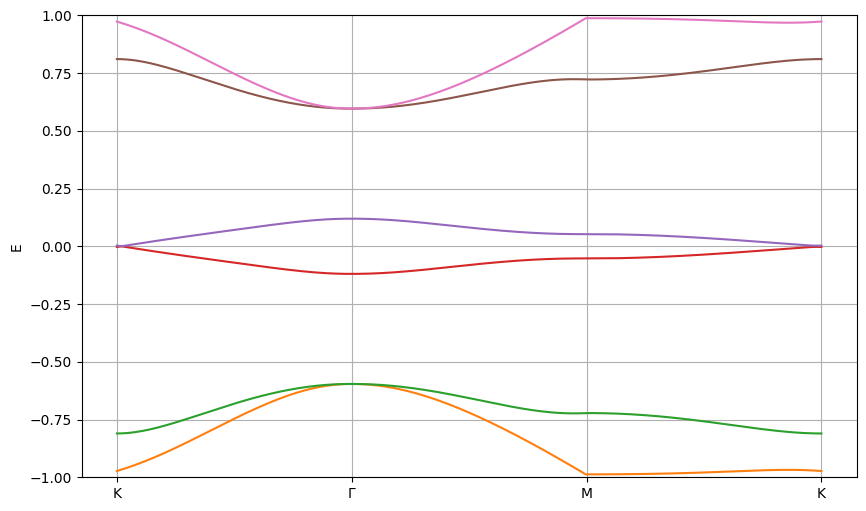

In [188]:
def plot_bands_2d(eigenvalues, k_path, path_points_labels):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot each band
    for band in range(eigenvalues.shape[1]):
        ax.plot(np.linspace(0, len(k_path), len(k_path)), eigenvalues[:, band], label=f'Band {band + 1}')
    
    # Set axis labels and limits
    #ax.set_xlabel("Path")
    ax.set_ylabel("E")
    ax.set_ylim([-1, 1])

    # Define tick positions for each high-symmetry point
    segment_length = len(k_path) // (len(path_points_labels) - 1)
    tick_positions = [i * segment_length for i in range(len(path_points_labels))]

    # Apply the labels and ticks
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(path_points_labels)

    #ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    ax.grid(True)
    plt.show()

# Define high-symmetry points in the moiré Brillouin zone
ktheta = 1  # Example ktheta value
K = ktheta * np.array([np.sqrt(3)/2, -1/2])
G = ktheta * np.array([0, 0])
M = ktheta * np.array([np.sqrt(3)/2, 0])

# Define k-point path and labels for ABCDA
path_points = [K, G, M, K]
path_points_labels = ["K", r"$\Gamma$", "M", "K"]
n_k_path = 100  # Number of points along each segment

# Generate points along the path
def interpolate_path(points, n_k):
    k_path = []
    for i in range(len(points) - 1):
        k_start = points[i]
        k_end = points[i + 1]
        segment = [k_start + (k_end - k_start) * t for t in np.linspace(0, 1, n_k)]
        k_path.extend(segment)
    return np.array(k_path)

k_path = interpolate_path(path_points, n_k_path)

# Calculate eigenvalues along the k-point path
eigenvalues = []
for k_vec in k_path:
    H = bistritzer_macdonald_H(k_vec)
    evals, _ = eigh(H)
    eigenvalues.append(evals)
eigenvalues = np.array(eigenvalues)

# Plot the band structure along the path
plot_bands_2d(eigenvalues, k_path, path_points_labels)
